# Convolution


2D 이미지 $H$와 2D filter(kernel or window) $F$가 있을때, 1차원 컨볼루션(convolution)과 상관관계(correlation)은 다음과 같이 정의한다.

1) Convolution(합성곱, 혹은 컨볼루션) operation: $G=H*F$

\begin{align}
G[i,j] = \sum_{u=-k}^k \sum_{v=-k}^k H[u,v]F[i-u, j-v]
\end{align}

컨볼루션 연산은 필터 $F$를 반전시킨 다음 적용시키는 것이 특징이다.


2) Cross-correlation(교차상관관계) operation: $G=H \circ F$

\begin{align}
G[i,j] = \sum_{u=-k}^k \sum_{v=-k}^k H[u,v]F[i+u, j+v]
\end{align}

상관관계는 원래의 필터와 입력 신호간의 유사성의 척도로 활용되는 연산이다.
디지털 신호처리 시 두 연산은 다른 목적으로 사용되는 연산이나, 일반적으로 뉴럴네트워크에 결합되는 convolution layer에서는 correlation을 기반으로 합성곱을 진행한다. ([Pytorch CONV2D Docs](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html))

Convolutional neural network의 이해를 돕기위해, 본 강의에서의 convolution연산을 cross-correlationl을 기반으로 설명/구현하고자 한다.






## 1차원 Convolution 실습

입력 데이터

- X = [2, 8, 3, 7, 1, 2, 0, 4, 5]
- W = [2, 1, 5, 3]

------------------------------
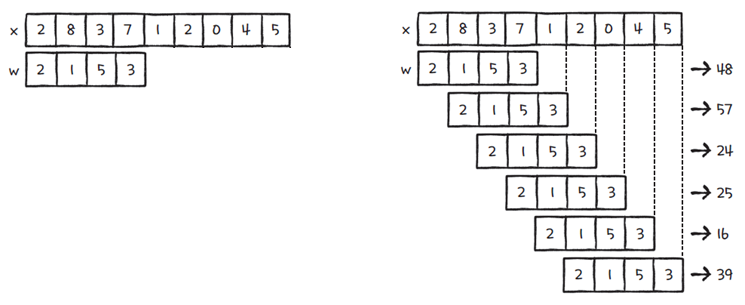










### 손으로 계산 연습

- 위 필터 W로 X를 1D Convolution한 연산 결과를 구하시오.
- Zero-padding을 3만큼 한 후 1D Convolution을 진행한 결과를 구하시오.
- 1번과 2번의 결과값의 길이가 같은가? 같지 않다면 그 이유는 무엇인가?

### Python 코딩
위의 1D convolution 과정을 Python으로 구현하여 계산한 후 그 결과값을 비교하시오.



In [13]:
import numpy as np

X = [2, 8, 3, 7, 1, 3, 0, 2, 5]
W = [2, 1, 5, 3]

####################################
# 1차원 convolution을 구현하시오
def Conv1D(input, filter, padding=0):
  filter_length = len(filter)
  input_length = len(input)
  answer_length = input_length - filter_length + 1 + 2 * padding

    # 패딩 적용
  if padding > 0:
    input = np.pad(input, (padding, padding), mode='constant')

  answer = np.zeros(answer_length)

  for i in range(answer_length):
    for j in range(filter_length):
      answer[i] += input[i + j] * filter[j]

  return answer
####################################

print(Conv1D(X, W, 1))

[51. 48. 57. 27. 30. 11. 31. 27.]


In [14]:
import numpy as np

X = [2, 8, 3, 7, 1, 3, 0, 2, 5]
W = [2, 1, 5, 3]

####################################
# 1차원 convolution을 구현하시오
def Conv1D(input, filter, padding=0):
    filter_length = len(filter)
    input_length = len(input)
    answer_length = input_length - filter_length + 1 + 2 * padding
    answer = np.zeros(answer_length)

    # 패딩 적용
    if padding > 0:
        input = np.pad(input, (padding, padding), mode='constant')

    for i in range(answer_length):
        for j in range(filter_length):
            answer[i] += input[i + j] * filter[j]

    return answer
####################################

print(Conv1D(X, W))

[48. 57. 27. 30. 11. 31.]


## 2차원 컨볼루션

아래 Python 코드에는 2D convolution이 구현되어 있다. 해당 함수를 분석한 뒤 아래 기능을 추가로 구현하시오.

- 1) numpy vector화 연산함수 사용

 numpy의 벡터/행렬연산을 사용하면(예: np.sum()) 4중 for loop를 2중 for loop으로 변경할 수 있으며 큰 연산량 감소 효과를 가져올 수 있다.

- 2) Zero-padding

 입력인자 padding값만큼 입력 이미지의 테두리를 0으로 채우는 연산

- 3) Edge detection (가로, 세로)
- 4) Image sharpening
- 5) Blurring





In [19]:
import numpy as np, cv2
from google.colab.patches import cv2_imshow
from skimage import io


def Conv2D(image, filter, padding=0):
    rows, cols = image.shape[:2]
    dst = np.zeros((rows - filter.shape[0] + 1 + 2 * padding, cols - filter.shape[1] + 1 + 2 * padding))

    # Apply zero-padding
    if padding > 0:
        image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')
    else:
        image_padded = image

    ycenter, xcenter = filter.shape[0] // 2, filter.shape[1] // 2

    for i in range(ycenter, rows - ycenter):
        for j in range(xcenter, cols - xcenter):
            sum = 0.0
            for u in range(filter.shape[0]):
                for v in range(filter.shape[1]):
                    y, x = i + u - ycenter, j + v - xcenter
                    sum += image_padded[y, x] * filter[u, v]
            dst[i - ycenter, j - xcenter] = sum

    return dst

image = io.imread('https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif')
image = cv2.resize(image, (128, 128))

# Define different filters for edge detection, sharpening, and blurring
edge_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
edge_filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sharpening_filter = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

blurring_filter = np.array([[1/9, 1/9, 1/9],
                            [1/9, 1/9, 1/9],
                            [1/9, 1/9, 1/9]])

# Apply different filters to the image
edge_x_result = Conv2D(image, edge_filter_x, padding=1)
edge_y_result = Conv2D(image, edge_filter_y, padding=1)
sharpened_image = Conv2D(image, sharpening_filter, padding=1)
blurred_image = Conv2D(image, blurring_filter, padding=1)

# Display original and processed images
cv2_imshow(image)
cv2_imshow(cv2.convertScaleAbs(edge_x_result))
cv2_imshow(cv2.convertScaleAbs(edge_y_result))
cv2_imshow(cv2.convertScaleAbs(sharpened_image))
cv2_imshow(cv2.convertScaleAbs(blurred_image))

ValueError: ignored